In [2]:

import pandas as pd
import re 
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
%pip install plotly 
import plotly.express as px
df=pd.read_excel('IPEDS_data.xlsx\IPEDS_data.xlsx')
df

     ---------------------------------------- 15.6/15.6 MB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Python311\\etc'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


ID number                                           Name  year  \
0        100654                       Alabama A & M University  2013   
1        100663            University of Alabama at Birmingham  2013   
2        100690                             Amridge University  2013   
3        100706            University of Alabama in Huntsville  2013   
4        100724                       Alabama State University  2013   
...         ...                                            ...   ...   
1529     451671   University of South Florida-Sarasota-Manatee  2013   
1530     454184                           The Kingâ€™s College  2013   
1531     454582                       Ottawa University-Online  2013   
1532     455770                   Providence Christian College  2013   
1533     456490  Polytechnic University of Puerto Rico-Orlando  2013   

        ZIP code                             Highest degree offered  \
0          35762             Doctor's degree - research/scholarship   
1     35294-0110  Doctor's degree - research/scholarship and pro...   
2     36117-3553  Doctor's degree - research/scholarship and pro...   
3          35899  Doctor's degree - research/scholarship and pro...   
4     36104-0271  Doctor's degree - research/scholarship and pro...   
...          ...                                                ...   
1529  34243-2049                                    Master's degree   
1530       10004                                  Bachelor's degree   
1531       66067                                    Master's degree   
1532       91104                                  Bachelor's degree   
1533       32825                                    Master's degree   

             County name  Longitude location of institution  \
0         Madison County                         -86.568502   
1       Jefferson County                         -86.809170   
2      Montgomery County                         -86.174010   
3         Madison County                         -86.638420   
4      Montgomery County                         -86.295677   
...                  ...                                ...   
1529      Manatee County                         -82.562951   
1530     New York County                         -74.012348   
1531     Franklin County                         -95.263775   
1532  Los Angeles County                        -118.118491   
1533       Orange County                         -81.254951   

      Latitude location of institution Religious affiliation  \
0                            34.783368        Not applicable   
1                            33.502230        Not applicable   
2                            32.362609    Churches of Christ   
3                            34.722818        Not applicable   
4                            32.364317        Not applicable   
...                                ...                   ...   
1529                         27.391766        Not applicable   
1530                         40.706861   Interdenominational   
1531                         38.602692      American Baptist   
1532                         34.172750      Undenominational   
1533                         28.551470        Not applicable   

     Offers Less than one year certificate  ...  \
0                               Implied no  ...   
1                               Implied no  ...   
2                               Implied no  ...   
3                                      Yes  ...   
4                               Implied no  ...   
...                                    ...  ...   
1529                            Implied no  ...   
1530                            Implied no  ...   
1531                            Implied no  ...   
1532                            Implied no  ...   
1533                            Implied no  ...   

     Percent of freshmen  receiving federal grant aid  \
0                                                81.0   
1                                  

In [3]:

df.info(verbose=True, show_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 145 columns):
 #    Column                                                                                  Non-Null Count  Dtype  
---   ------                                                                                  --------------  -----  
 0    ID number                                                                               1534 non-null   int64  
 1    Name                                                                                    1534 non-null   object 
 2    year                                                                                    1534 non-null   int64  
 3    ZIP code                                                                                1534 non-null   object 
 4    Highest degree offered                                                                  1534 non-null   object 
 5    County name                                                 

In [4]:
# Get the number of nan values for each column
df.isna().sum().sort_values(ascending = False)

Endowment assets (year end) per FTE enrollment (GASB)      1018
SAT Writing 25th percentile score                           820
SAT Writing 75th percentile score                           820
Number of first-time undergraduates - foreign countries     623
Percent of first-time undergraduates - out-of-state         623
                                                           ... 
Level of institution                                          0
Control of institution                                        0
Historically Black College or University                      0
Tribal college                                                0
State abbreviation                                            0
Length: 145, dtype: int64

In [5]:
dropped_col = df.isna().sum()[df.isna().sum()>=(0.2*len(df))].index.values
#df.isna().sum()
df.drop(dropped_col, axis = 1, inplace = True)

In [6]:
df.shape


(1534, 127)

In [7]:
our_columns=['Name', 'year', 'Highest degree offered', "Offers Bachelor's degree",
       "Offers Master's degree",
       "Offers Doctor's degree - research/scholarship",
       "Offers Doctor's degree - professional practice", 'Applicants total',
       'Admissions total', 'Enrolled total', 'Estimated enrollment, total',
       'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'State abbreviation', 'Control of institution', 'Total  enrollment',
       'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Percent of graduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 years, total',
       'Graduation rate - Bachelor degree within 5 years, total',
       'Graduation rate - Bachelor degree within 6 years, total',
       ]

In [8]:
df = df[our_columns]

In [10]:
# Check if there is any nan values for any columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 29 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Name                                                            1534 non-null   object 
 1   year                                                            1534 non-null   int64  
 2   Highest degree offered                                          1534 non-null   object 
 3   Offers Bachelor's degree                                        1532 non-null   object 
 4   Offers Master's degree                                          1532 non-null   object 
 5   Offers Doctor's degree - research/scholarship                   1532 non-null   object 
 6   Offers Doctor's degree - professional practice                  1532 non-null   object 
 7   Applicants total                                   

In [11]:
modified_columns = []

for col in our_columns:
    formatted_col = re.sub(r'[^\w\s]', '', col)
    formatted_col = re.sub(r'\s+', '_', formatted_col).strip()
    modified_columns.append(formatted_col)

for i, col in enumerate(modified_columns):
    print(f"{i} {col}")

0 Name
1 year
2 Highest_degree_offered
3 Offers_Bachelors_degree
4 Offers_Masters_degree
5 Offers_Doctors_degree_researchscholarship
6 Offers_Doctors_degree_professional_practice
7 Applicants_total
8 Admissions_total
9 Enrolled_total
10 Estimated_enrollment_total
11 Tuition_and_fees_201314
12 Total_price_for_instate_students_living_on_campus_201314
13 Total_price_for_outofstate_students_living_on_campus_201314
14 State_abbreviation
15 Control_of_institution
16 Total_enrollment
17 Fulltime_enrollment
18 Parttime_enrollment
19 Undergraduate_enrollment
20 Graduate_enrollment
21 Fulltime_undergraduate_enrollment
22 Parttime_undergraduate_enrollment
23 Percent_of_total_enrollment_that_are_women
24 Percent_of_undergraduate_enrollment_that_are_women
25 Percent_of_graduate_enrollment_that_are_women
26 Graduation_rate_Bachelor_degree_within_4_years_total
27 Graduation_rate_Bachelor_degree_within_5_years_total
28 Graduation_rate_Bachelor_degree_within_6_years_total


In [12]:
renamed_columns = dict(zip(df.columns, modified_columns))
df.rename(columns=renamed_columns, inplace=True)
df

C:\Users\marwa\AppData\Local\Temp\ipykernel_1212\2316364824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=renamed_columns, inplace=True)


Name  year  \
0                          Alabama A & M University  2013   
1               University of Alabama at Birmingham  2013   
2                                Amridge University  2013   
3               University of Alabama in Huntsville  2013   
4                          Alabama State University  2013   
...                                             ...   ...   
1529   University of South Florida-Sarasota-Manatee  2013   
1530                           The Kingâ€™s College  2013   
1531                       Ottawa University-Online  2013   
1532                   Providence Christian College  2013   
1533  Polytechnic University of Puerto Rico-Orlando  2013   

                                 Highest_degree_offered  \
0                Doctor's degree - research/scholarship   
1     Doctor's degree - research/scholarship and pro...   
2     Doctor's degree - research/scholarship and pro...   
3     Doctor's degree - research/scholarship and pro...   
4     Doctor's degree - research/scholarship and pro...   
...                                                 ...   
1529                                    Master's degree   
1530                                  Bachelor's degree   
1531                                    Master's degree   
1532                                  Bachelor's degree   
1533                                    Master's degree   

     Offers_Bachelors_degree Offers_Masters_degree  \
0                        Yes                   Yes   
1                        Yes                   Yes   
2                        Yes                   Yes   
3                        Yes                   Yes   
4                        Yes                   Yes   
...                      ...                   ...   
1529                     Yes                   Yes   
1530                     Yes            Implied no   
1531                     Yes                   Yes   
1532                     Yes            Implied no   
1533                     Yes                   Yes   

     Offers_Doctors_degree_researchscholarship  \
0                                          Yes   
1                                          Yes   
2                                          Yes   
3                                          Yes   
4                                          Yes   
...                                        ...   
1529                                Implied no   
1530                                Implied no   
1531                                Implied no   
1532                                Implied no   
1533                                Implied no   

     Offers_Doctors_degree_professional_practice  Applicants_total  \
0                                     Implied no            6142.0   
1                                            Yes            5689.0   
2                                            Yes               NaN   
3                                            Yes            2054.0   
4                                            Yes           10245.0   
...                                          ...               ...   
1529                                  Implied no             393.0   
1530                                  Implied no            3033.0   
1531                                  Implied no               NaN   
1532                                  Implied no             122.0   
1533                                  Implied no               NaN   

      Admissions_total  Enrolled_total  ...  Undergraduate_enrollment  \
0               5521.0          1104.0  ...                    4051.0   
1               4934.0          1773.0  ...                   11502.0   
2                  NaN             NaN  ...                     322.0   
3               1656.0           651.0  ...                    5696.0   
4               5251.0          1479.0  ...                    5356.0   
...                ...             ...  ...                       ...   
152

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 29 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Name                                                         1534 non-null   object 
 1   year                                                         1534 non-null   int64  
 2   Highest_degree_offered                                       1534 non-null   object 
 3   Offers_Bachelors_degree                                      1532 non-null   object 
 4   Offers_Masters_degree                                        1532 non-null   object 
 5   Offers_Doctors_degree_researchscholarship                    1532 non-null   object 
 6   Offers_Doctors_degree_professional_practice                  1532 non-null   object 
 7   Applicants_total                                             1377 non-null   f

In [14]:

df.dropna(axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1116 entries, 0 to 1525
Data columns (total 29 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Name                                                         1116 non-null   object 
 1   year                                                         1116 non-null   int64  
 2   Highest_degree_offered                                       1116 non-null   object 
 3   Offers_Bachelors_degree                                      1116 non-null   object 
 4   Offers_Masters_degree                                        1116 non-null   object 
 5   Offers_Doctors_degree_researchscholarship                    1116 non-null   object 
 6   Offers_Doctors_degree_professional_practice                  1116 non-null   object 
 7   Applicants_total                                             1116 non-null   float6

C:\Users\marwa\AppData\Local\Temp\ipykernel_1212\2655198492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,inplace=True)


In [15]:
df[df.duplicated()]

Empty DataFrame
Columns: [Name, year, Highest_degree_offered, Offers_Bachelors_degree, Offers_Masters_degree, Offers_Doctors_degree_researchscholarship, Offers_Doctors_degree_professional_practice, Applicants_total, Admissions_total, Enrolled_total, Estimated_enrollment_total, Tuition_and_fees_201314, Total_price_for_instate_students_living_on_campus_201314, Total_price_for_outofstate_students_living_on_campus_201314, State_abbreviation, Control_of_institution, Total_enrollment, Fulltime_enrollment, Parttime_enrollment, Undergraduate_enrollment, Graduate_enrollment, Fulltime_undergraduate_enrollment, Parttime_undergraduate_enrollment, Percent_of_total_enrollment_that_are_women, Percent_of_undergraduate_enrollment_that_are_women, Percent_of_graduate_enrollment_that_are_women, Graduation_rate_Bachelor_degree_within_4_years_total, Graduation_rate_Bachelor_degree_within_5_years_total, Graduation_rate_Bachelor_degree_within_6_years_total]
Index: []

[0 rows x 29 columns]

In [16]:
float_columns = df.select_dtypes(include='float64')
float_columns

Applicants_total  Admissions_total  Enrolled_total  \
0               6142.0            5521.0          1104.0   
1               5689.0            4934.0          1773.0   
3               2054.0            1656.0           651.0   
4              10245.0            5251.0          1479.0   
5              30975.0           17515.0          6454.0   
...                ...               ...             ...   
1503           10804.0            7108.0          2761.0   
1507            1998.0            1568.0           333.0   
1511            6960.0            4484.0           756.0   
1516            1611.0             960.0           254.0   
1525            3195.0            1406.0           562.0   

      Estimated_enrollment_total  Tuition_and_fees_201314  \
0                         5024.0                   7182.0   
1                        18568.0                   7206.0   
3                         7376.0                   9192.0   
4                         6076.0                   8720.0   
5                        34752.0                   9450.0   
...                          ...                      ...   
1503                     14098.0                   6118.0   
1507                      1519.0                  27456.0   
1511                      5177.0                   6471.0   
1516                      1003.0                  23000.0   
1525                      4965.0                   5820.0   

      Total_price_for_instate_students_living_on_campus_201314  \
0                                               21849.0          
1                                               22495.0          
3                                               23466.0          
4                                               18286.0          
5                                               27000.0          
...                                                 ...          
1503                                            19102.0          
1507                                            41461.0          
1511                                            25007.0          
1516                                            36860.0          
1525                                            20170.0          

      Total_price_for_outofstate_students_living_on_campus_201314  \
0                                               27441.0             
1                                               31687.0             
3                                               35780.0             
4                                               25222.0             
5                                               41500.0             
...                                                 ...             
1503                                            38424.0             
1507                                            41461.0             
1511                                            36167.0             
1516                                            36860.0             
1525                                            31086.0             

      Total_enrollment  Fulltime_enrollment  Parttime_enrollment  \
0               5020.0               4439.0                581.0   
1              18568.0              11961.0               6607.0   
3               7376.0               4802.0               2574.0   
4               6075.0               5182.0                893.0   
5              34752.0              29498.0               5254.0   
...                ...                  ...                  ...   
1503           14077.0              10539.0               3538.0   
1507            1529.0               1393.0                136.0   
1511            5140.0               4401.0                739.0   
1516             988.0                965.0                 23.0   
1525            4660.0               2792.0               1868.0   

      Undergraduate_enrollment  Graduate_enrollment  \
0                       4051.0                969.0   
1  

In [17]:
float_columns_without_applicants = float_columns.drop(columns=['Applicants_total'])

num_columns_per_subset = len(float_columns_without_applicants.columns) // 4

dfs = []
start_idx = 0
for i in range(4):
    end_idx = start_idx + num_columns_per_subset
    if i == 3:
        subset = float_columns_without_applicants.iloc[:, start_idx:]
    else:
        subset = float_columns_without_applicants.iloc[:, start_idx:end_idx]
    subset_with_applicants = pd.concat([subset, df['Applicants_total']], axis=1)
    dfs.append(subset_with_applicants)
    start_idx = end_idx

df1, df2, df3, df4 = dfs


In [18]:
df_1=pd.DataFrame(df1)
df_2=pd.DataFrame(df2)
df_3=pd.DataFrame(df3)
df_4=pd.DataFrame(df4)

In [19]:
df_2

Total_price_for_instate_students_living_on_campus_201314  \
0                                               21849.0          
1                                               22495.0          
3                                               23466.0          
4                                               18286.0          
5                                               27000.0          
...                                                 ...          
1503                                            19102.0          
1507                                            41461.0          
1511                                            25007.0          
1516                                            36860.0          
1525                                            20170.0          

      Total_price_for_outofstate_students_living_on_campus_201314  \
0                                               27441.0             
1                                               31687.0             
3                                               35780.0             
4                                               25222.0             
5                                               41500.0             
...                                                 ...             
1503                                            38424.0             
1507                                            41461.0             
1511                                            36167.0             
1516                                            36860.0             
1525                                            31086.0             

      Total_enrollment  Fulltime_enrollment  Applicants_total  
0               5020.0               4439.0            6142.0  
1              18568.0              11961.0            5689.0  
3               7376.0               4802.0            2054.0  
4               6075.0               5182.0           10245.0  
5              34752.0              29498.0           30975.0  
...                ...                  ...               ...  
1503           14077.0              10539.0           10804.0  
1507            1529.0               1393.0            1998.0  
1511            5140.0               4401.0            6960.0  
1516             988.0                965.0            1611.0  
1525            4660.0               2792.0            3195.0  

[1116 rows x 5 columns]

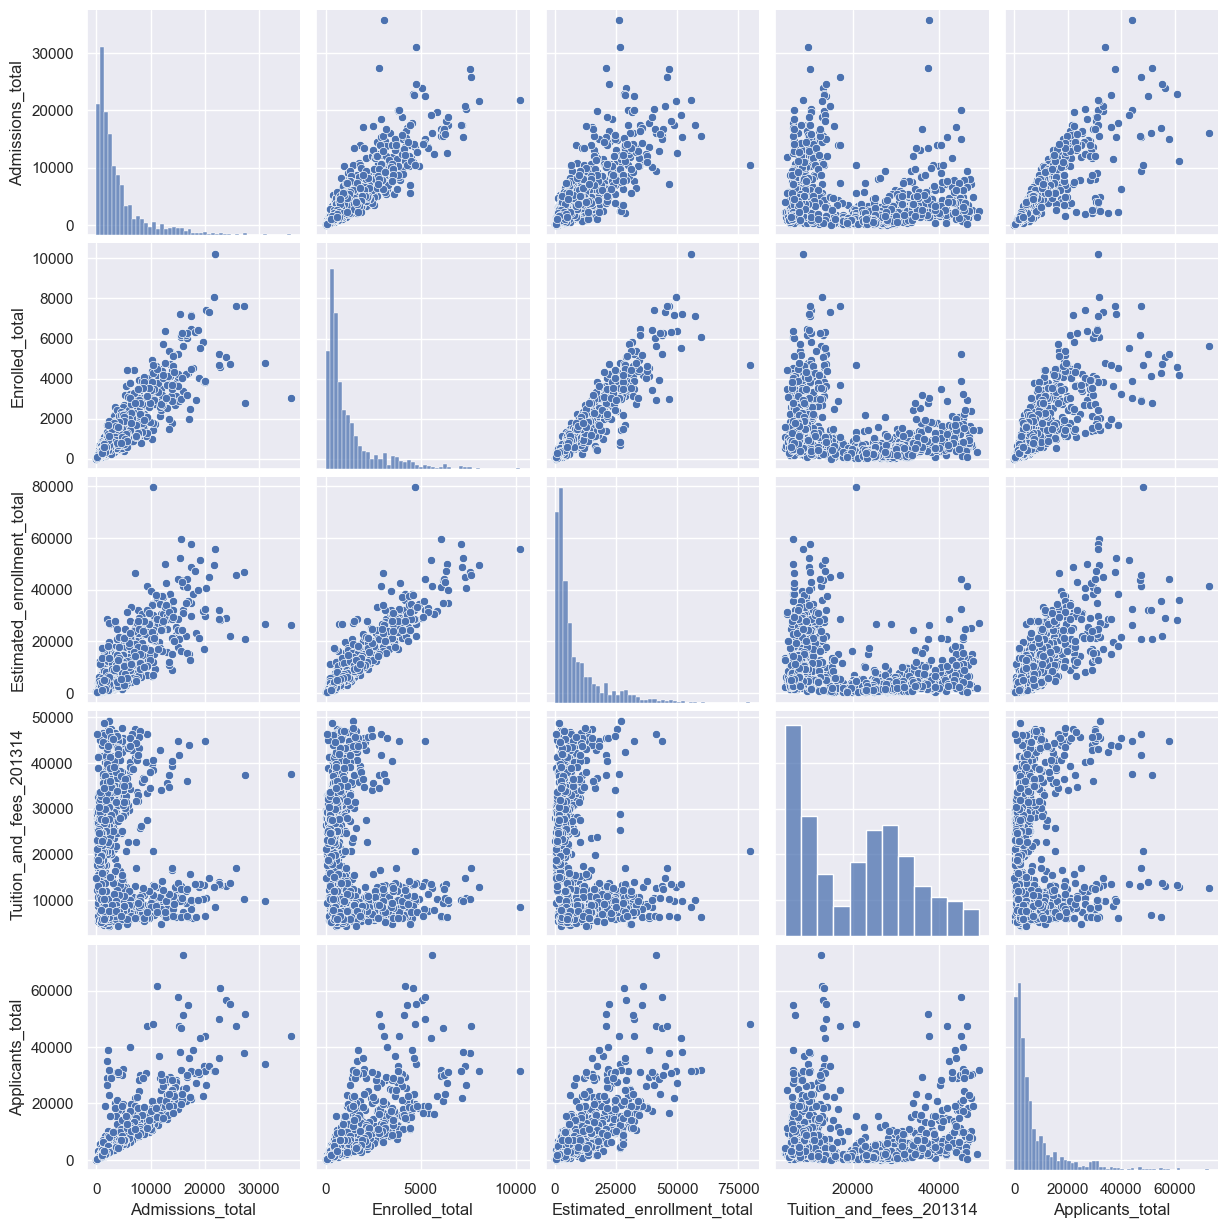

In [20]:
sns.pairplot(df_1)

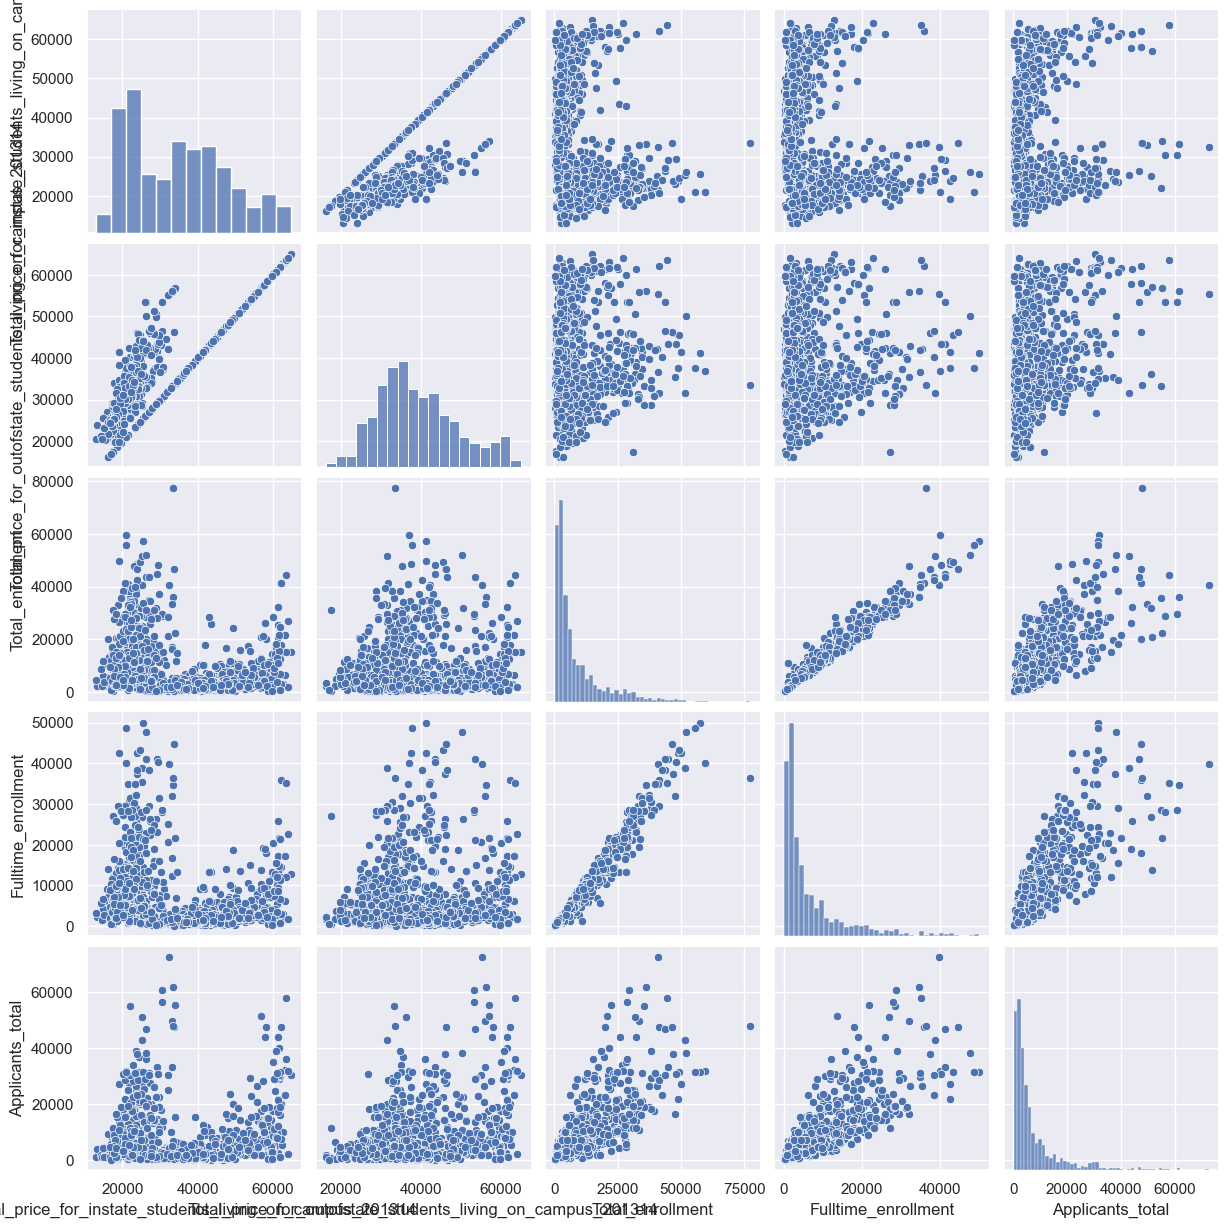

In [21]:
sns.pairplot(df_2)

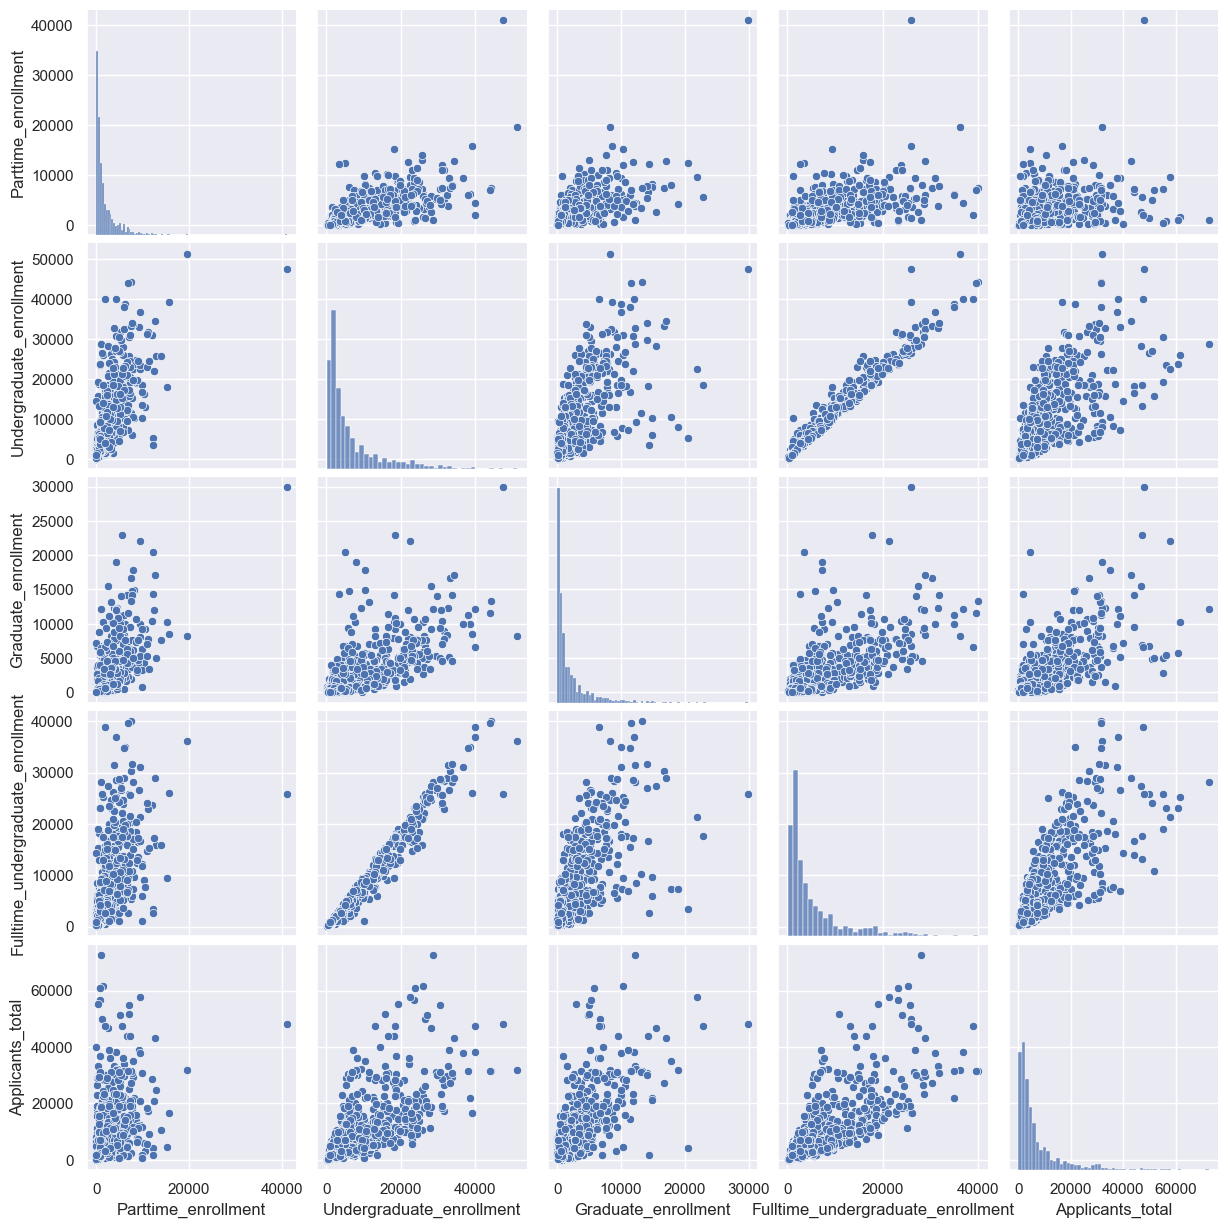

In [22]:
sns.pairplot(df_3)

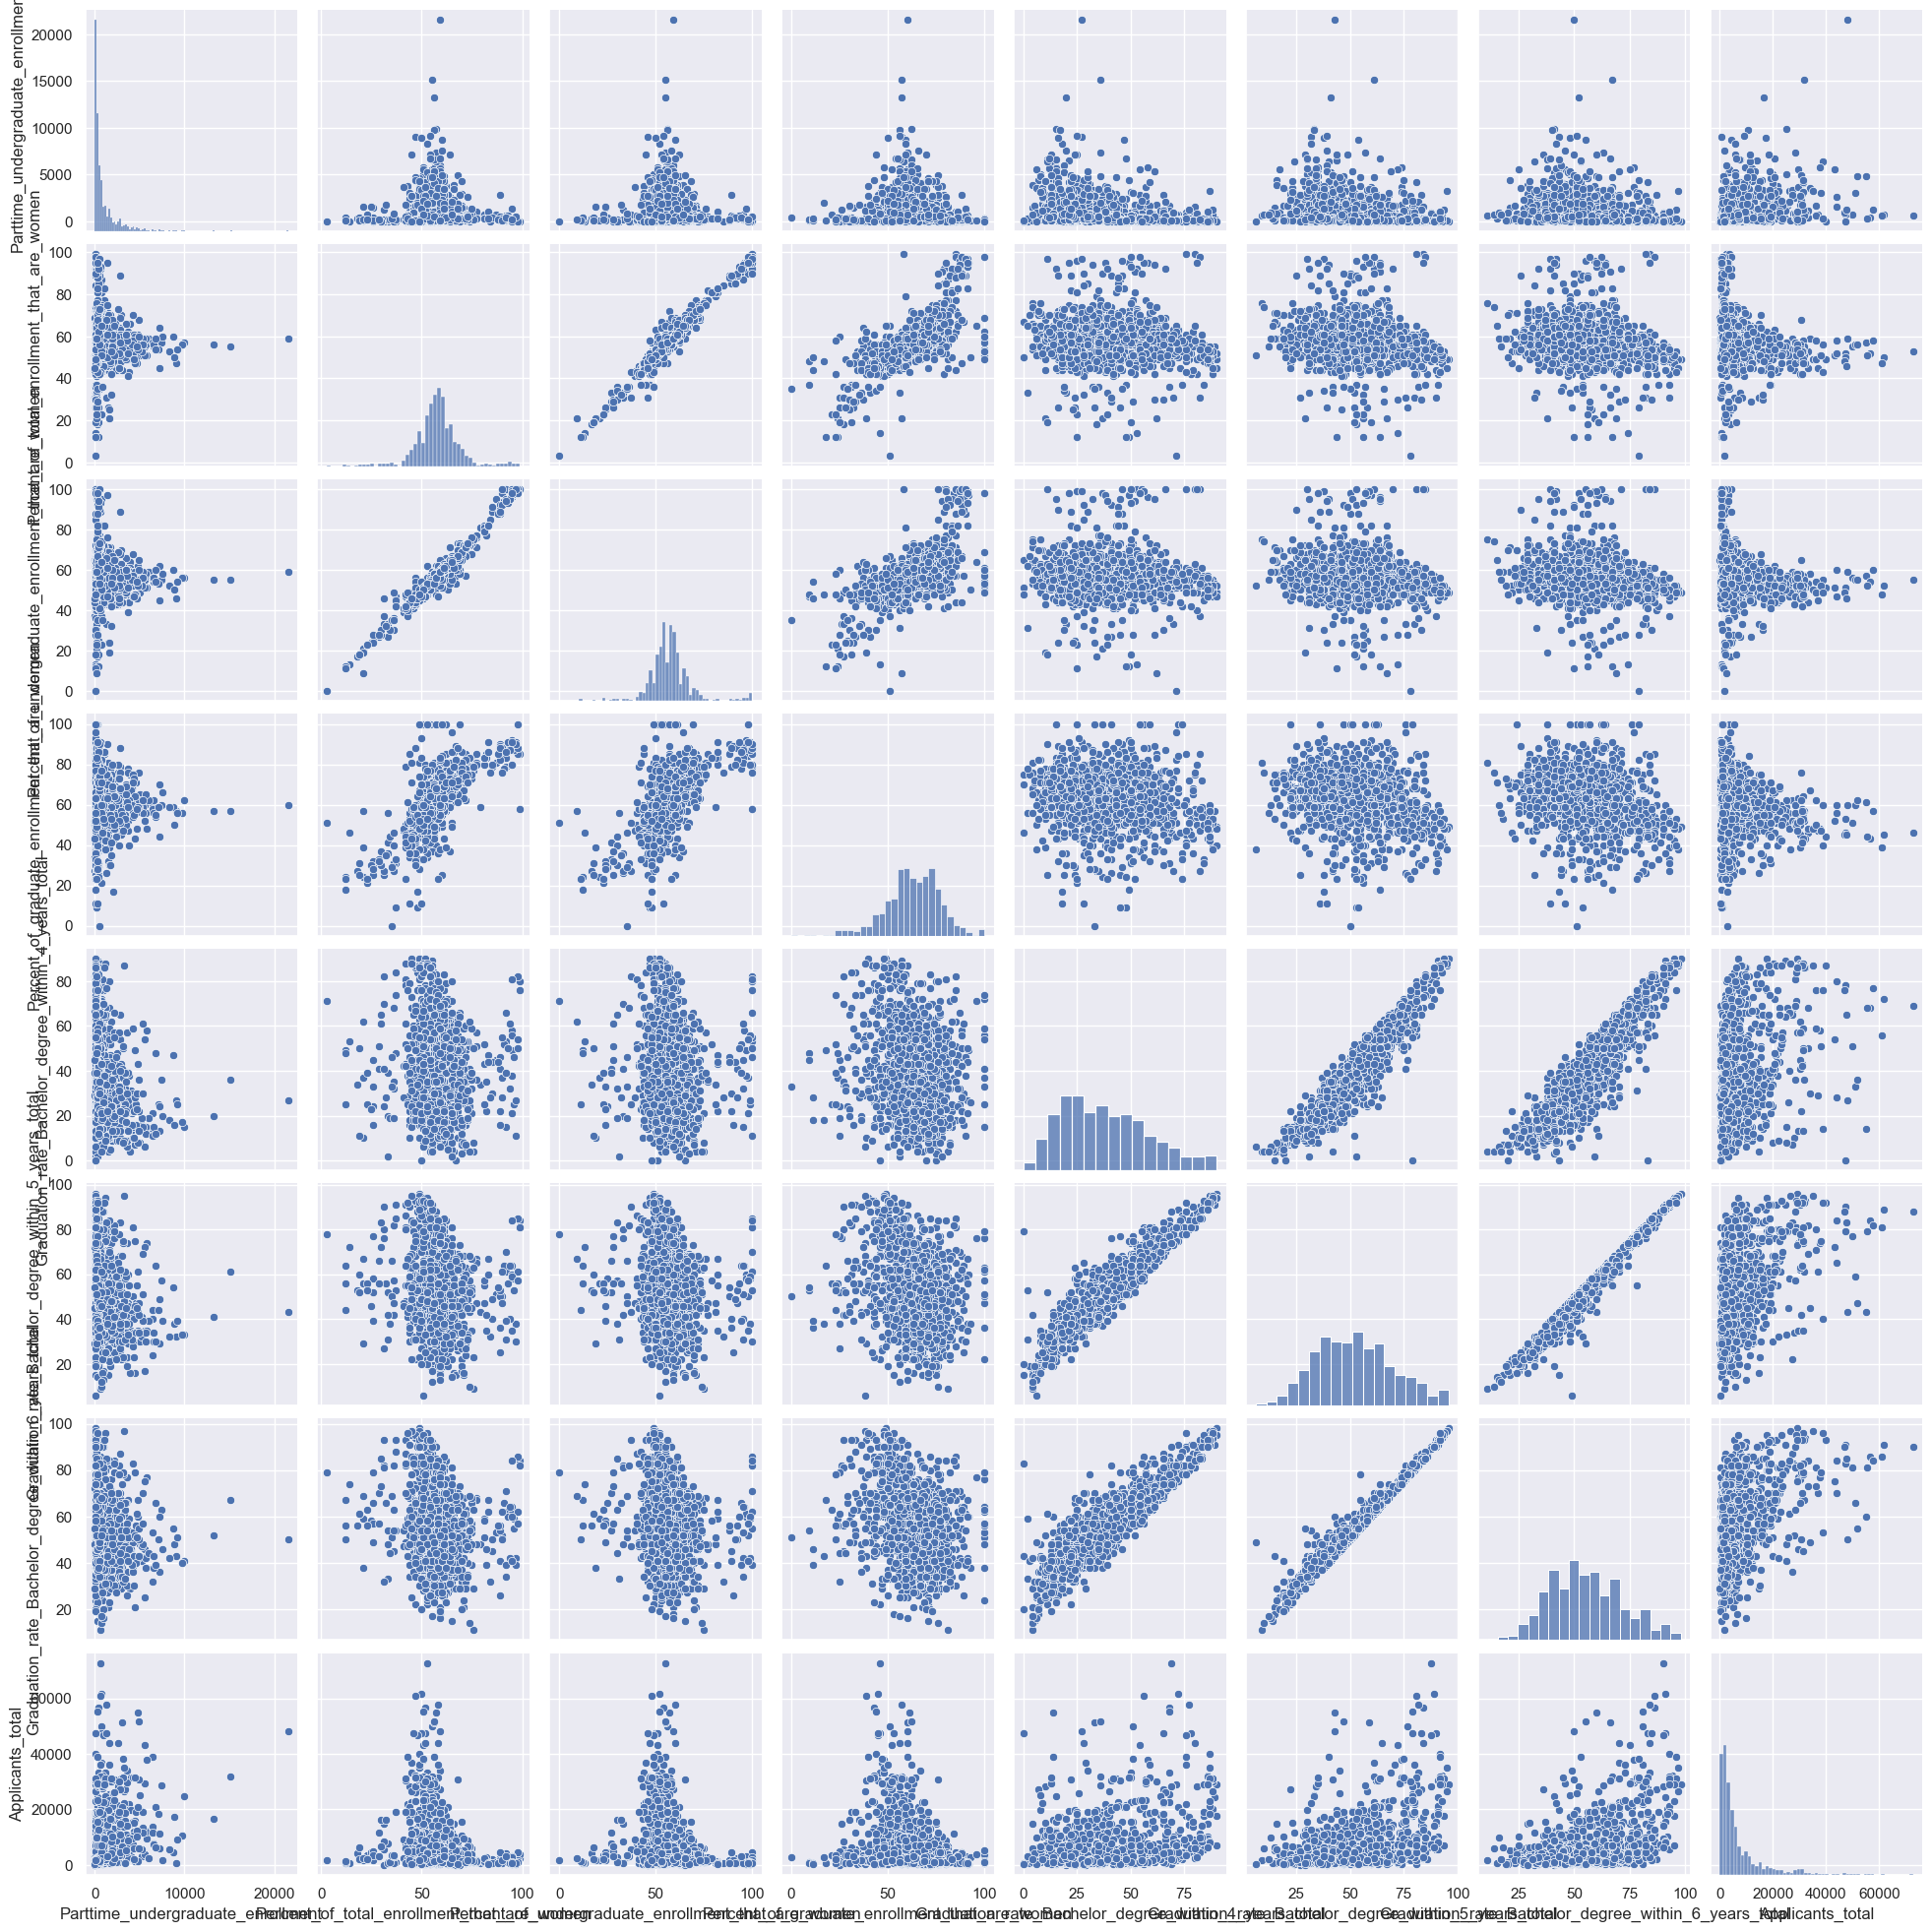

In [23]:
sns.pairplot(df_4)

In [24]:
high_app = df[['Name','Applicants_total']].sort_values("Applicants_total",ascending = False).head(20)
high_app

Name  Applicants_total
84         University of California-Los Angeles           72676.0
81            University of California-Berkeley           61717.0
86           University of California-San Diego           60832.0
841                         New York University           57845.0
83              University of California-Irvine           56515.0
87       University of California-Santa Barbara           55258.0
77       California State University-Long Beach           55019.0
863               St John's University-New York           51634.0
126                  San Diego State University           51163.0
82               University of California-Davis           49820.0
1371                         Liberty University           48054.0
1133  Pennsylvania State University-Main Campus           47552.0
559                     Northeastern University           47364.0
137           University of Southern California           47358.0
605            University of Michigan-Ann Arbor           46813.0
529                           Boston University           44006.0
1080                          Drexel University           43945.0
634         University of Minnesota-Twin Cities           43048.0
796                          Cornell University           39999.0
75        California State University-Fullerton           38909.0

C:\Users\marwa\AppData\Local\Temp\ipykernel_1212\612455379.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Applicants_total',y='Name',data =high_app,palette='viridis' )


Text(0.5, 0, 'Number of applications')

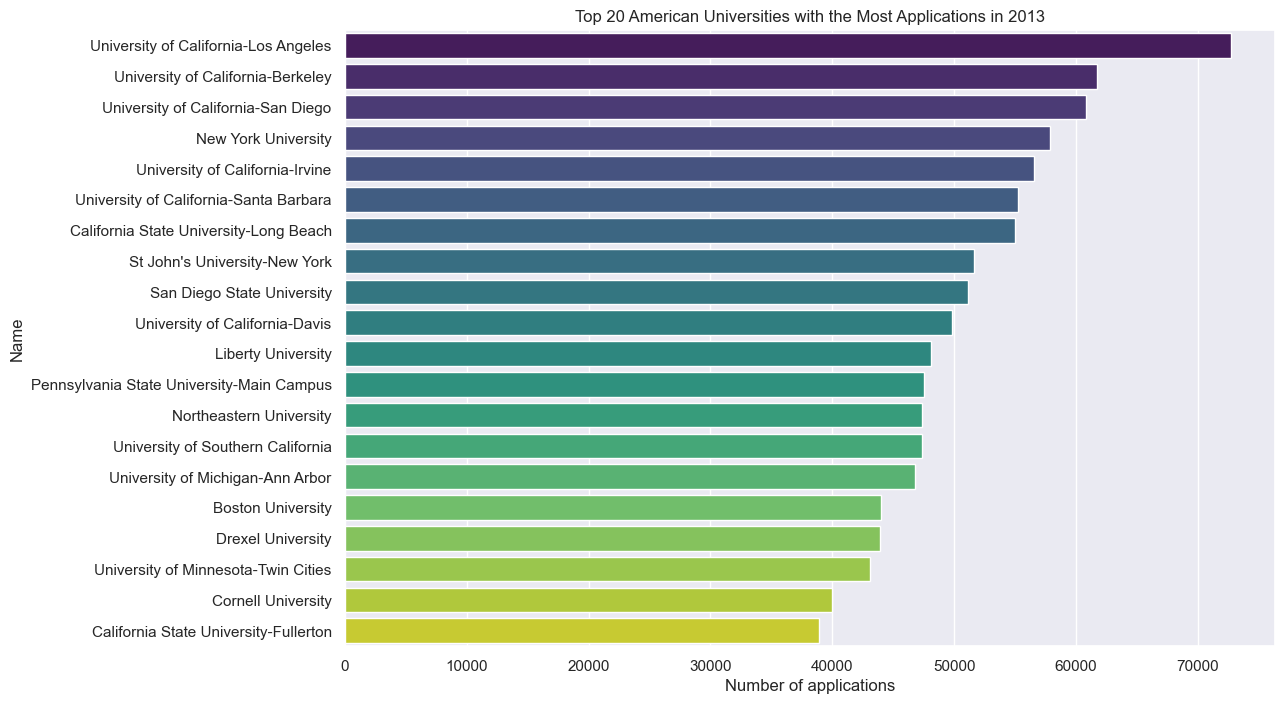

In [25]:
plt.figure(figsize=(12,8))
sns.barplot(x='Applicants_total',y='Name',data =high_app,palette='viridis' )
plt.title('Top 20 American Universities with the Most Applications in 2013')
plt.xlabel('Number of applications')

In [26]:
df['acceptance_rate']=(df.Admissions_total/df.Applicants_total*100).round(2)
df['enrollment_rate']=(df.Enrolled_total/df.Admissions_total*100).round(2)
df.head()

C:\Users\marwa\AppData\Local\Temp\ipykernel_1212\1559789137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['acceptance_rate']=(df.Admissions_total/df.Applicants_total*100).round(2)
C:\Users\marwa\AppData\Local\Temp\ipykernel_1212\1559789137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['enrollment_rate']=(df.Enrolled_total/df.Admissions_total*100).round(2)


Name  year  \
0             Alabama A & M University  2013   
1  University of Alabama at Birmingham  2013   
3  University of Alabama in Huntsville  2013   
4             Alabama State University  2013   
5            The University of Alabama  2013   

                              Highest_degree_offered Offers_Bachelors_degree  \
0             Doctor's degree - research/scholarship                     Yes   
1  Doctor's degree - research/scholarship and pro...                     Yes   
3  Doctor's degree - research/scholarship and pro...                     Yes   
4  Doctor's degree - research/scholarship and pro...                     Yes   
5  Doctor's degree - research/scholarship and pro...                     Yes   

  Offers_Masters_degree Offers_Doctors_degree_researchscholarship  \
0                   Yes                                       Yes   
1                   Yes                                       Yes   
3                   Yes                                       Yes   
4                   Yes                                       Yes   
5                   Yes                                       Yes   

  Offers_Doctors_degree_professional_practice  Applicants_total  \
0                                  Implied no            6142.0   
1                                         Yes            5689.0   
3                                         Yes            2054.0   
4                                         Yes           10245.0   
5                                         Yes           30975.0   

   Admissions_total  Enrolled_total  ...  Fulltime_undergraduate_enrollment  \
0            5521.0          1104.0  ...                             3799.0   
1            4934.0          1773.0  ...                             8357.0   
3            1656.0           651.0  ...                             4237.0   
4            5251.0          1479.0  ...                             4872.0   
5           17515.0          6454.0  ...                            26548.0   

   Parttime_undergraduate_enrollment  \
0                              252.0   
1                             3145.0   
3                             1459.0   
4                              484.0   
5                             2892.0   

   Percent_of_total_enrollment_that_are_women  \
0                                        55.0   
1                                        61.0   
3                                        44.0   
4                                        61.0   
5                                        55.0   

   Percent_of_undergraduate_enrollment_that_are_women  \
0                                               51.0    
1                                               58.0    
3                                               44.0    
4                                               59.0    
5                                               54.0    

  Percent_of_graduate_enrollment_that_are_women  \
0                                          69.0   
1                                          64.0   
3                                          43.0   
4                                          71.0   
5                                          58.0   

  Graduation_rate_Bachelor_degree_within_4_years_total  \
0                                               10.0     
1                                               29.0     
3                                               16.0     
4                                                9.0     
5                                               43.0     

   Graduation_rate_Bachelor_degree_within_5_years_total  \
0                                               23.0      
1                                               46.0      
3                                               37.0      
4                                               19.0      
5                                               62.0      

   Graduation_rate_Bachelor_degree_within_6_years_total  acceptance_rate  \
0    

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.scatterplot(x= df['Applicants_total'], y=df['acceptance_rate'], ax= axes[0])
sns.scatterplot(x= df['enrollment_rate'], y=df['acceptance_rate'], ax= axes[1])

print(f"correlation between no. of applicants and acceptance rate = {df['Applicants_total'].corr(df['acceptance_rate'])}\n")
print(f"correlation between enrollment rate and acceptance rate = {df['enrollment_rate'].corr(df['acceptance_rate'])}\n")

correlation between no. of applicants and acceptance rate = -0.39841153899478116

correlation between enrollment rate and acceptance rate = -0.06102821533250295



Text(0.5, 0, 'Acceptance Rate %')

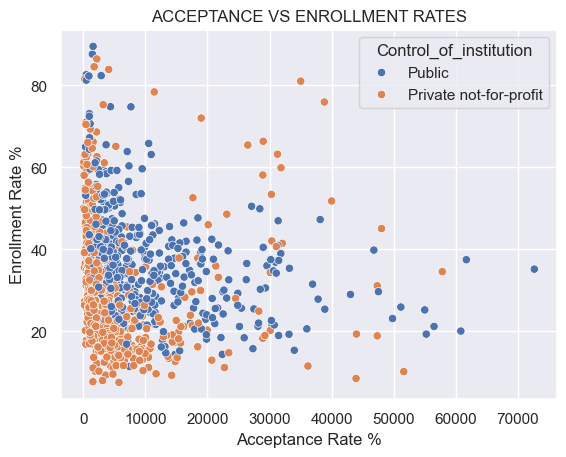

In [28]:
sns.scatterplot(x='Applicants_total', y='enrollment_rate', hue='Control_of_institution', data=df)
plt.title('ACCEPTANCE VS ENROLLMENT RATES')
plt.ylabel('Enrollment Rate %')
plt.xlabel('Acceptance Rate %')

Text(0, 0.5, 'Average of enrollment rate')

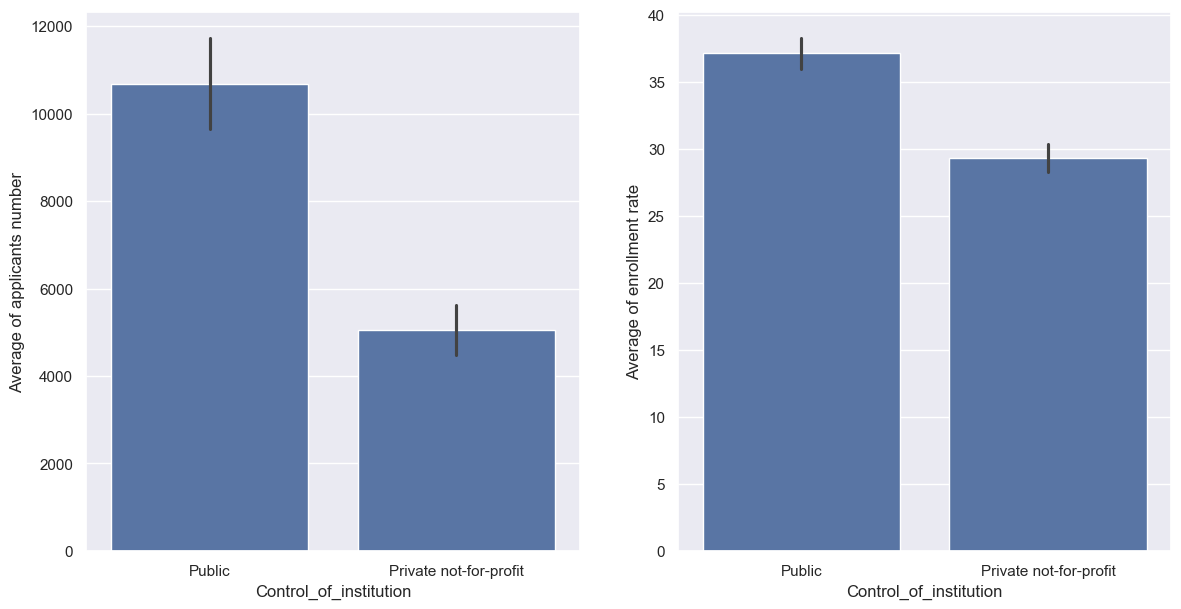

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

sns.barplot(x= df['Control_of_institution'], y=df['Applicants_total'], ax= axes[0])
axes[0].set_ylabel("Average of applicants number")

sns.barplot(x= df['Control_of_institution'], y=df['enrollment_rate'], ax= axes[1])
axes[1].set_ylabel("Average of enrollment rate")

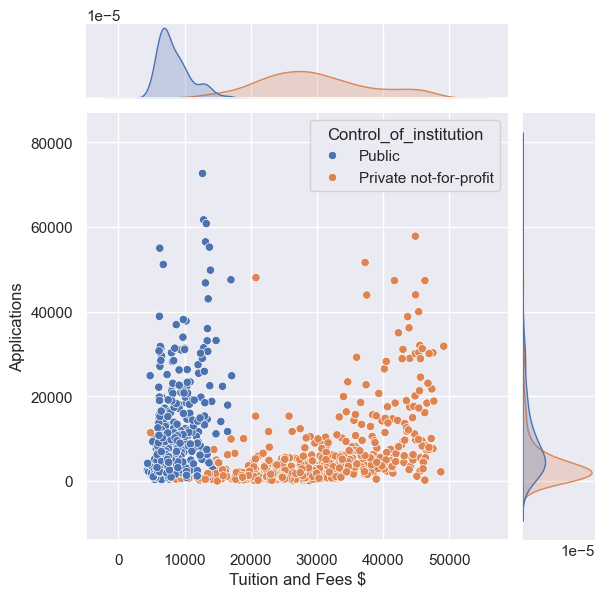

In [30]:
g=sns.jointplot(x=df.Tuition_and_fees_201314,y=df.Applicants_total,hue=df.Control_of_institution,height=6);
g=(g.set_axis_labels("Tuition and Fees $","Applications"))

Text(0, 0.5, 'Average of Tuition and fees')

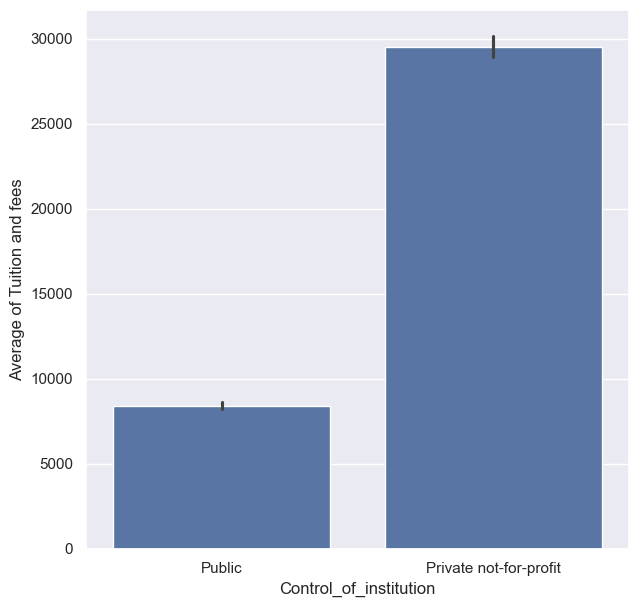

In [31]:
plt.figure(figsize=(7,7))
sns.barplot(x= df['Control_of_institution'], y=df['Tuition_and_fees_201314'])
plt.ylabel("Average of Tuition and fees")

Text(0, 0.5, 'price for in-state students living')

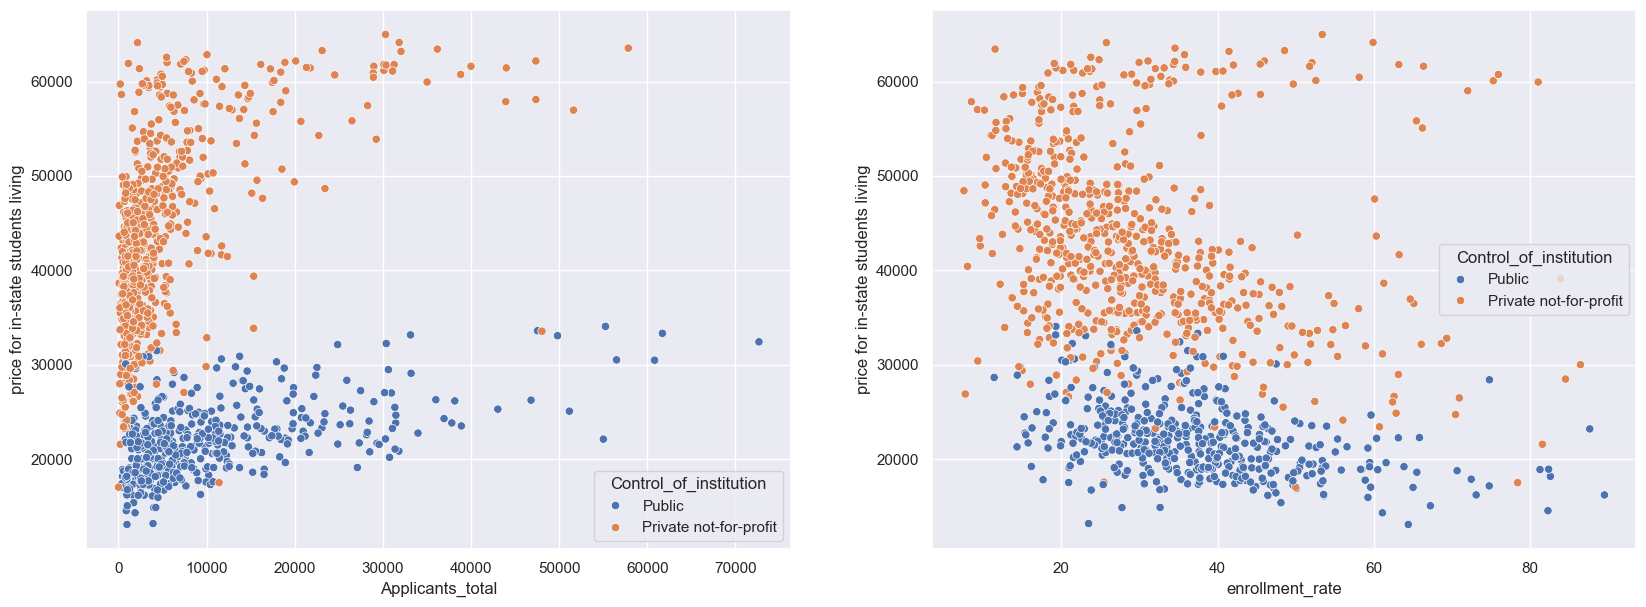

In [32]:
# price for in-state students living
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.scatterplot(x= df['Applicants_total'], y=df['Total_price_for_instate_students_living_on_campus_201314'], ax= axes[0], hue= df['Control_of_institution'])
axes[0].set_ylabel("price for in-state students living")

sns.scatterplot(x= df['enrollment_rate'], y=df['Total_price_for_instate_students_living_on_campus_201314'], ax= axes[1], hue= df['Control_of_institution'])
axes[1].set_ylabel("price for in-state students living")

Text(0, 0.5, 'price for out-of-state students living')

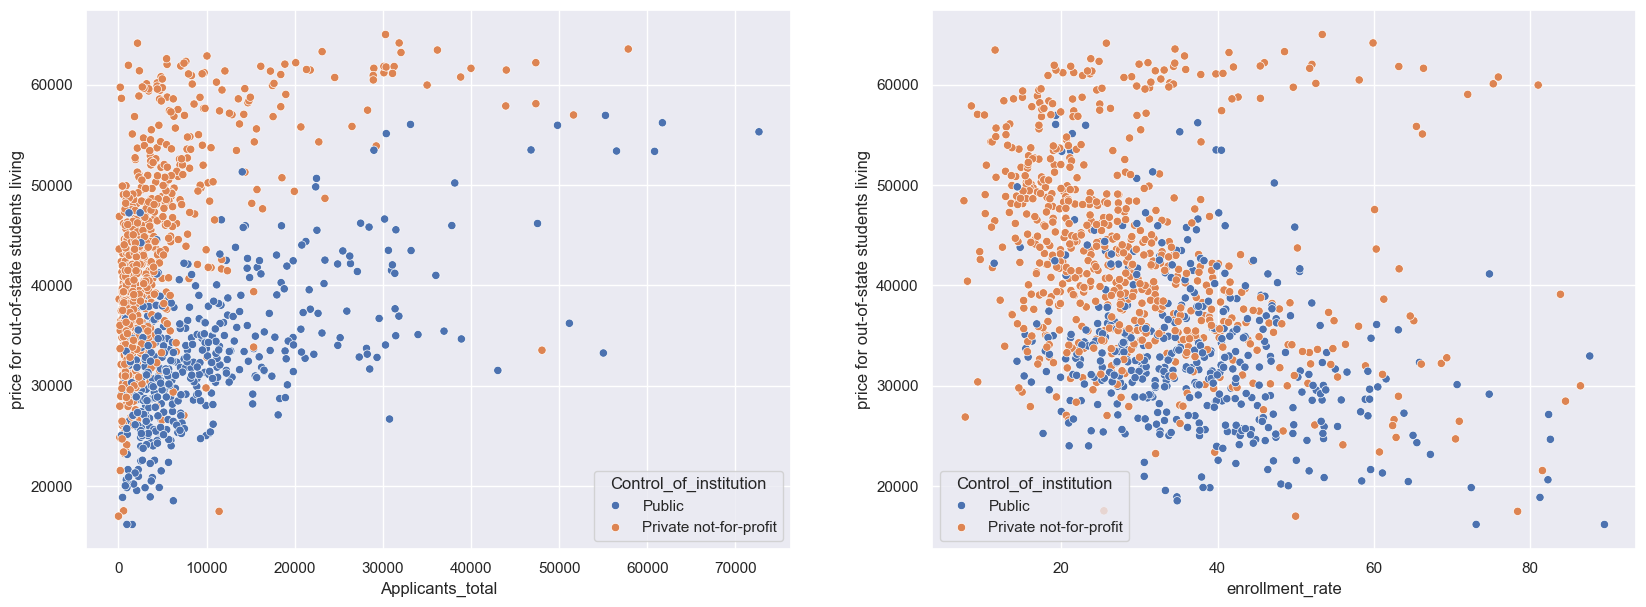

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.scatterplot(x= df['Applicants_total'], y=df['Total_price_for_outofstate_students_living_on_campus_201314'], ax= axes[0], hue= df['Control_of_institution'])
axes[0].set_ylabel("price for out-of-state students living")

sns.scatterplot(x= df['enrollment_rate'], y=df['Total_price_for_outofstate_students_living_on_campus_201314'], ax= axes[1], hue= df['Control_of_institution'])
axes[1].set_ylabel("price for out-of-state students living")

In [35]:
# we can first select the highly populated states... 
popular_states = ['California', 'Florida', 'Texas', 'New York', 'Pennsylvania']
df["popular_state"] = df["State_abbreviation"].apply(lambda x: True if x in popular_states else False)
df

C:\Users\marwa\AppData\Local\Temp\ipykernel_1212\3596775421.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["popular_state"] = df["State_abbreviation"].apply(lambda x: True if x in popular_states else False)


Name  year  \
0                        Alabama A & M University  2013   
1             University of Alabama at Birmingham  2013   
3             University of Alabama in Huntsville  2013   
4                        Alabama State University  2013   
5                       The University of Alabama  2013   
...                                           ...   ...   
1503                Florida Gulf Coast University  2013   
1507            Johnson & Wales University-Denver  2013   
1511  California State University-Channel Islands  2013   
1516                         Ave Maria University  2013   
1525    University of South Florida-St Petersburg  2013   

                                 Highest_degree_offered  \
0                Doctor's degree - research/scholarship   
1     Doctor's degree - research/scholarship and pro...   
3     Doctor's degree - research/scholarship and pro...   
4     Doctor's degree - research/scholarship and pro...   
5     Doctor's degree - research/scholarship and pro...   
...                                                 ...   
1503  Doctor's degree - research/scholarship and pro...   
1507                                    Master's degree   
1511                                    Master's degree   
1516                            Doctor's degree - other   
1525                                    Master's degree   

     Offers_Bachelors_degree Offers_Masters_degree  \
0                        Yes                   Yes   
1                        Yes                   Yes   
3                        Yes                   Yes   
4                        Yes                   Yes   
5                        Yes                   Yes   
...                      ...                   ...   
1503                     Yes                   Yes   
1507                     Yes                   Yes   
1511                     Yes                   Yes   
1516                     Yes                   Yes   
1525                     Yes                   Yes   

     Offers_Doctors_degree_researchscholarship  \
0                                          Yes   
1                                          Yes   
3                                          Yes   
4                                          Yes   
5                                          Yes   
...                                        ...   
1503                                       Yes   
1507                                Implied no   
1511                                Implied no   
1516                                Implied no   
1525                                Implied no   

     Offers_Doctors_degree_professional_practice  Applicants_total  \
0                                     Implied no            6142.0   
1                                            Yes            5689.0   
3                                            Yes            2054.0   
4                                            Yes           10245.0   
5                                            Yes           30975.0   
...                                          ...               ...   
1503                                         Yes           10804.0   
1507                                  Implied no            1998.0   
1511                                  Implied no            6960.0   
1516                                  Implied no            1611.0   
1525                                  Implied no            3195.0   

      Admissions_total  Enrolled_total  ...  \
0               5521.0          1104.0  ...   
1               4934.0          1773.0  ...   
3               1656.0           651.0  ...   
4               5251.0          1479.0  ...   
5              17515.0          6454.0  ...   
...                ...             ...  ...   
1503            7108.0          2761.0  ...   
1507            1568.0           333.0  ...   
1511            4484.0           756.0  ...   
1516             960.0           254.0  ...   
1525            140

Text(0, 0.5, 'Enrollments Rate %')

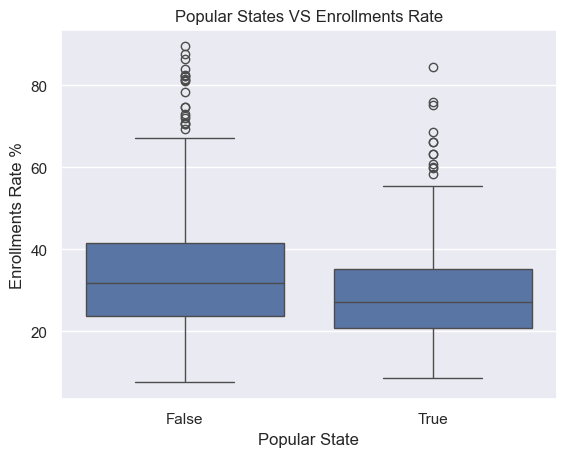

In [36]:
sns.boxplot(data = df,x = "popular_state",y = "enrollment_rate")
plt.title("Popular States VS Enrollments Rate")
plt.xlabel("Popular State")
plt.ylabel("Enrollments Rate %")

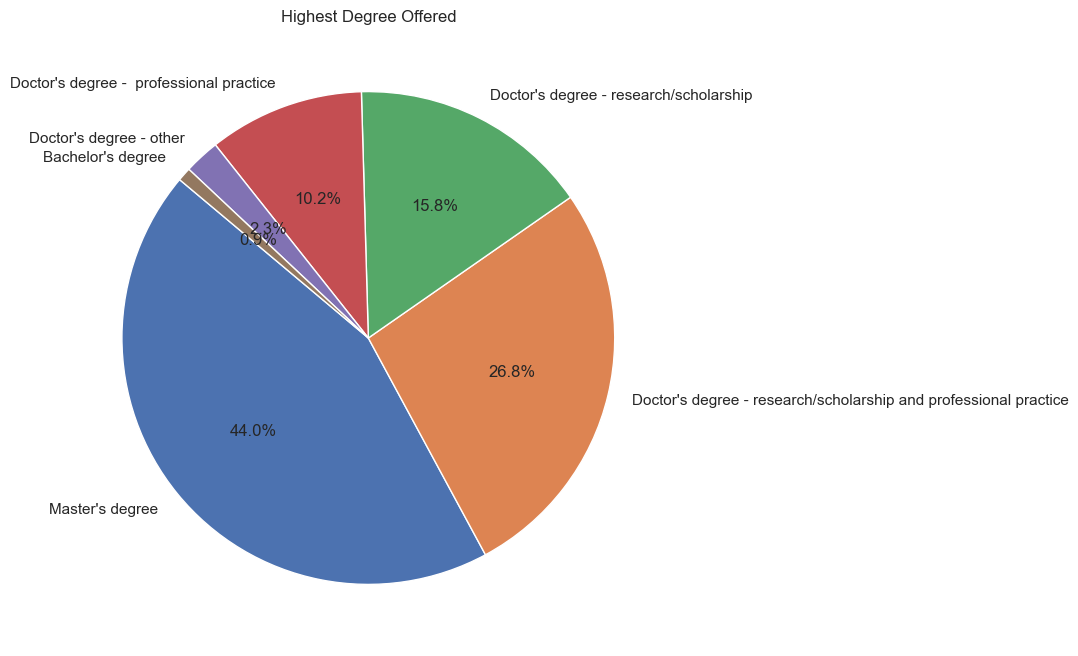

In [37]:
hg_degree=df.Highest_degree_offered.value_counts()
plt.figure(figsize=(16,8))
plt.pie(hg_degree,labels=hg_degree.index,
       autopct='%.1f%%',startangle=140)
plt.title('Highest Degree Offered');

C:\Users\marwa\AppData\Local\Temp\ipykernel_1212\2886802713.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(('''Doctor's Degree:


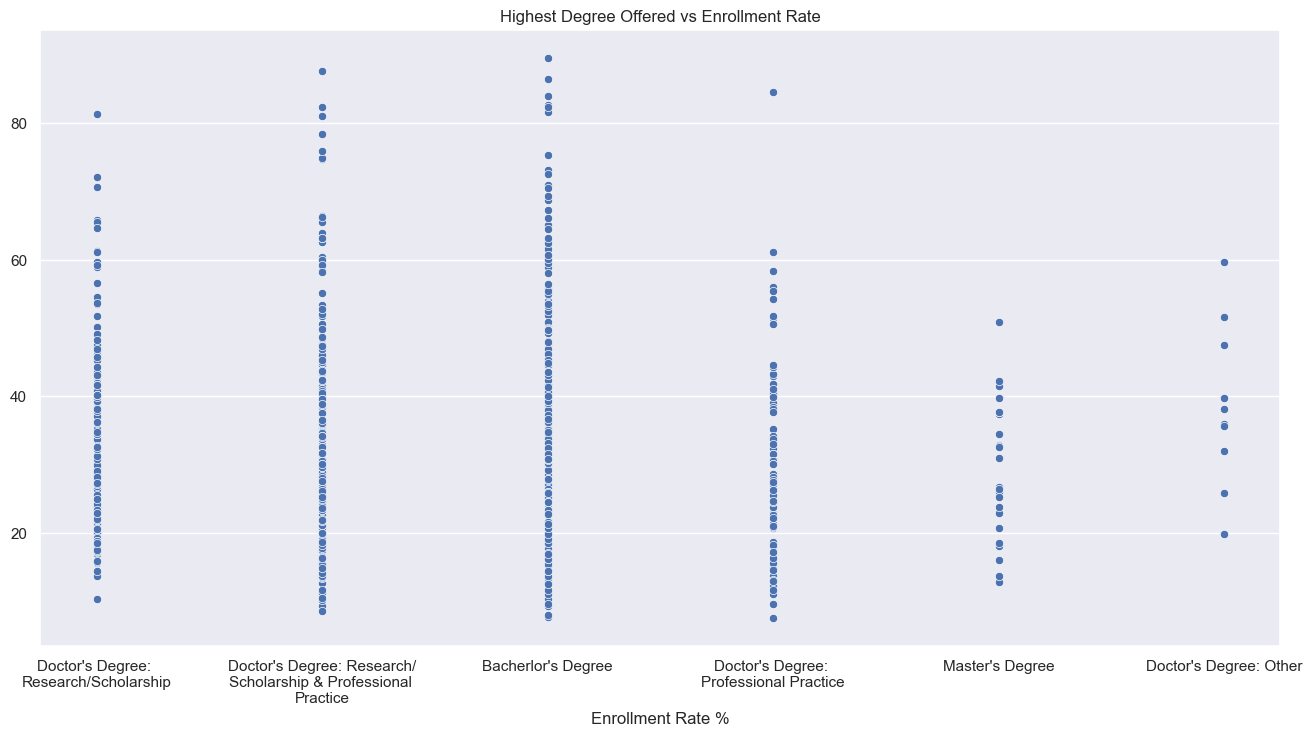

In [38]:
plt.figure(figsize=(16,8))
ax=sns.scatterplot(x='Highest_degree_offered',y='enrollment_rate',data=df);
plt.title('Highest Degree Offered vs Enrollment Rate')
plt.ylabel('')
plt.xlabel('Enrollment Rate %')
plt.grid(axis='x')
ax.set_xticklabels(('''Doctor's Degree: 
Research/Scholarship''',
                    '''Doctor's Degree: Research/
Scholarship & Professional 
Practice''',
                    "Bacherlor's Degree",
                    '''Doctor's Degree: 
Professional Practice''',
                    "Master's Degree",
                    "Doctor's Degree: Other"));

### Conclusions:-

- A high number of applications does not imply that a university is preferred among students.

- Students do not necessarily prefer a university because of its high acceptance rate or, in other words, the students’ preference is not based on how easy it is for them to be admitted to a university.

- There is a strong students’ preference for public universities.

- Two of the main reasons why public universities are preferred by students are: first, on average public universities present more affordable tuition and fees than private universities; second, public universities have more affordable on-campus living costs.

- Students, in general, prefer universities with affordable costs of on-campus living.

- The majority of universities offer up to a Master's degree. It's interesting to note that there is a high percentage of universities that offer only up to a Bachelor's degree.